In [1]:
import os
os.chdir('/data/l989o/deployed/a')
import sys
if '/data/l989o/a' in sys.path:
    sys.path.remove('/data/l989o/a')

# No transform

In [2]:
from data2 import CellDataset

d = {'expression': False, 'center': False, 'ome': True, 'mask': False}
ds = CellDataset('train', d)

In [17]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

s = StandardScaler(with_mean=True, with_std=True)

for i in tqdm(range(len(ds))):
    l= ds[i]
    x = l[0]
    s.partial_fit(x.reshape(-1, x.shape[-1]))
    
print(s.mean_, s.var_)

 35%|███▍      | 154798/446738 [03:38<06:52, 707.93it/s]


KeyboardInterrupt: 

In [ ]:
print(len(ds))
ds[len(ds) - 1]

In [12]:
s.mean_

array([1.29137214, 0.12204645, 0.04746121, 1.17126412, 0.24452078,
       0.427998  , 0.07071735, 0.11199224, 0.04566163, 0.63347302,
       0.62917786, 0.13072797, 0.27373635, 0.02843522, 0.06192851,
       0.38788928, 0.11424681, 0.07840189, 0.2078604 , 0.02232897,
       4.8215692 , 0.13145834, 0.05435668, 0.17872389, 0.0315007 ,
       0.03429091, 0.20750708, 0.6714512 , 0.09881951, 0.12434302,
       0.51898777, 0.18728622, 0.03190125, 0.28144336, 0.11512508,
       2.50877083, 0.16205379, 0.52616125, 0.99683675])

In [13]:
s.var_

array([3.17532575e+01, 3.66818966e-01, 6.65207711e-01, 3.33794102e+01,
       4.22485386e+00, 9.36283163e+00, 2.23369604e-01, 7.86815906e+00,
       5.32690521e-01, 4.84695307e+01, 2.08140218e+01, 7.09183370e+00,
       1.92951659e+00, 9.45509177e-01, 9.75673669e-01, 2.01367976e+02,
       1.37284794e+00, 3.73569237e-01, 4.87192135e+00, 5.64851603e-01,
       5.69273662e+02, 6.52422796e+01, 3.68515530e-01, 1.66068873e+00,
       1.29575157e-01, 6.50012842e-01, 2.25449424e+01, 1.09436277e+01,
       2.24749223e+00, 8.06681989e+00, 5.34230461e+00, 8.48350188e+00,
       9.04868194e-02, 3.58260224e+00, 1.58120290e+00, 2.32770610e+02,
       6.65773423e-01, 6.49080885e+00, 2.20182966e+01])

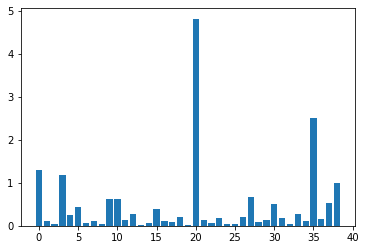

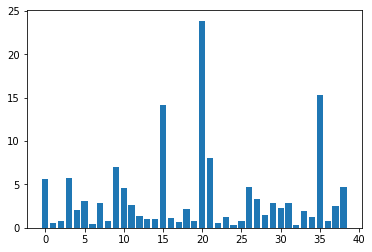

<BarContainer object of 39 artists>

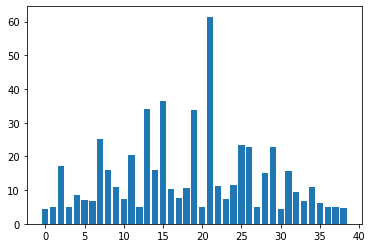

In [16]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.array([1.29137214, 0.12204645, 0.04746121, 1.17126412, 0.24452078,
       0.427998  , 0.07071735, 0.11199224, 0.04566163, 0.63347302,
       0.62917786, 0.13072797, 0.27373635, 0.02843522, 0.06192851,
       0.38788928, 0.11424681, 0.07840189, 0.2078604 , 0.02232897,
       4.8215692 , 0.13145834, 0.05435668, 0.17872389, 0.0315007 ,
       0.03429091, 0.20750708, 0.6714512 , 0.09881951, 0.12434302,
       0.51898777, 0.18728622, 0.03190125, 0.28144336, 0.11512508,
       2.50877083, 0.16205379, 0.52616125, 0.99683675])
std = np.sqrt(np.array([3.17532575e+01, 3.66818966e-01, 6.65207711e-01, 3.33794102e+01,
       4.22485386e+00, 9.36283163e+00, 2.23369604e-01, 7.86815906e+00,
       5.32690521e-01, 4.84695307e+01, 2.08140218e+01, 7.09183370e+00,
       1.92951659e+00, 9.45509177e-01, 9.75673669e-01, 2.01367976e+02,
       1.37284794e+00, 3.73569237e-01, 4.87192135e+00, 5.64851603e-01,
       5.69273662e+02, 6.52422796e+01, 3.68515530e-01, 1.66068873e+00,
       1.29575157e-01, 6.50012842e-01, 2.25449424e+01, 1.09436277e+01,
       2.24749223e+00, 8.06681989e+00, 5.34230461e+00, 8.48350188e+00,
       9.04868194e-02, 3.58260224e+00, 1.58120290e+00, 2.32770610e+02,
       6.65773423e-01, 6.49080885e+00, 2.20182966e+01]))

plt.bar(np.arange(39), mean)
plt.show()
plt.bar(np.arange(39), std)
plt.show()
plt.bar(np.arange(39), std / mean)

In [17]:
import torch
a = torch.rand(3, 32, 31)
b = torch.rand(3)
(a.permute(1, 2, 0) - b).permute(2, 0, 1).shape

torch.Size([3, 32, 31])

# arcsinh transform

In [4]:
from data2 import CellDataset

d = {'expression': False, 'center': False, 'ome': True, 'mask': False}
ds = CellDataset('train', d)

In [5]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

s = StandardScaler(with_mean=True, with_std=True)

for i in tqdm(range(len(ds))):
    l= ds[i]
    x = l[0]
    x = np.arcsinh(x)
    s.partial_fit(x.reshape(-1, x.shape[-1]))
    
print(s.mean_, s.var_)

100%|██████████| 446738/446738 [12:11<00:00, 610.82it/s]

[0.3128328  0.08154685 0.02617499 0.31149776 0.10011313 0.13143819
 0.04897958 0.05522078 0.02628855 0.12524123 0.15552816 0.08004793
 0.13349437 0.02045013 0.04155505 0.07637688 0.05526352 0.04818857
 0.11221485 0.01779799 0.53215206 0.08219107 0.03510931 0.08550659
 0.02237169 0.02657647 0.09854327 0.22031476 0.04274541 0.06778383
 0.24079644 0.09004467 0.0234197  0.13312621 0.04914724 0.29719813
 0.10172928 0.18843424 0.25893724] [0.81152901 0.11195328 0.03844969 0.76020458 0.19636732 0.30648388
 0.06448294 0.08879372 0.03747649 0.32956727 0.40133228 0.11878445
 0.24177647 0.02510913 0.05398327 0.15110854 0.09525968 0.07278724
 0.17972434 0.01950939 1.73329118 0.11334923 0.04934192 0.15689578
 0.02762272 0.03045641 0.16039316 0.49438282 0.07485281 0.10151964
 0.45035213 0.15424273 0.02854364 0.23177609 0.09494518 0.98995058
 0.14861627 0.41785507 0.66190155]


In [6]:
s.mean_

array([0.3128328 , 0.08154685, 0.02617499, 0.31149776, 0.10011313,
       0.13143819, 0.04897958, 0.05522078, 0.02628855, 0.12524123,
       0.15552816, 0.08004793, 0.13349437, 0.02045013, 0.04155505,
       0.07637688, 0.05526352, 0.04818857, 0.11221485, 0.01779799,
       0.53215206, 0.08219107, 0.03510931, 0.08550659, 0.02237169,
       0.02657647, 0.09854327, 0.22031476, 0.04274541, 0.06778383,
       0.24079644, 0.09004467, 0.0234197 , 0.13312621, 0.04914724,
       0.29719813, 0.10172928, 0.18843424, 0.25893724])

In [7]:
s.var_

array([0.81152901, 0.11195328, 0.03844969, 0.76020458, 0.19636732,
       0.30648388, 0.06448294, 0.08879372, 0.03747649, 0.32956727,
       0.40133228, 0.11878445, 0.24177647, 0.02510913, 0.05398327,
       0.15110854, 0.09525968, 0.07278724, 0.17972434, 0.01950939,
       1.73329118, 0.11334923, 0.04934192, 0.15689578, 0.02762272,
       0.03045641, 0.16039316, 0.49438282, 0.07485281, 0.10151964,
       0.45035213, 0.15424273, 0.02854364, 0.23177609, 0.09494518,
       0.98995058, 0.14861627, 0.41785507, 0.66190155])

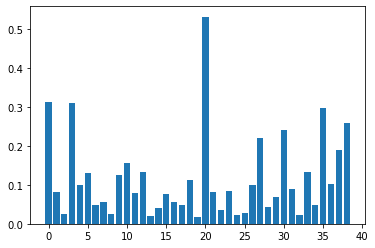

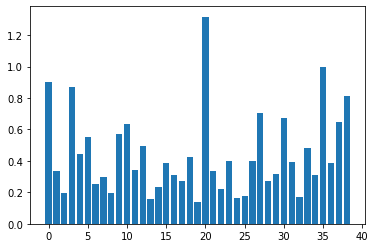

<BarContainer object of 39 artists>

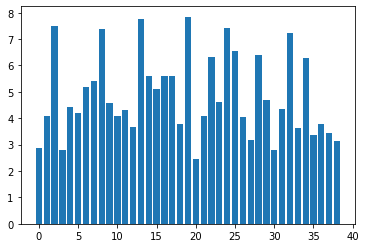

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.array([0.3128328 , 0.08154685, 0.02617499, 0.31149776, 0.10011313,
       0.13143819, 0.04897958, 0.05522078, 0.02628855, 0.12524123,
       0.15552816, 0.08004793, 0.13349437, 0.02045013, 0.04155505,
       0.07637688, 0.05526352, 0.04818857, 0.11221485, 0.01779799,
       0.53215206, 0.08219107, 0.03510931, 0.08550659, 0.02237169,
       0.02657647, 0.09854327, 0.22031476, 0.04274541, 0.06778383,
       0.24079644, 0.09004467, 0.0234197 , 0.13312621, 0.04914724,
       0.29719813, 0.10172928, 0.18843424, 0.25893724])
std = np.sqrt(np.array([0.81152901, 0.11195328, 0.03844969, 0.76020458, 0.19636732,
       0.30648388, 0.06448294, 0.08879372, 0.03747649, 0.32956727,
       0.40133228, 0.11878445, 0.24177647, 0.02510913, 0.05398327,
       0.15110854, 0.09525968, 0.07278724, 0.17972434, 0.01950939,
       1.73329118, 0.11334923, 0.04934192, 0.15689578, 0.02762272,
       0.03045641, 0.16039316, 0.49438282, 0.07485281, 0.10151964,
       0.45035213, 0.15424273, 0.02854364, 0.23177609, 0.09494518,
       0.98995058, 0.14861627, 0.41785507, 0.66190155]))

plt.bar(np.arange(39), mean)
plt.show()
plt.bar(np.arange(39), std)
plt.show()
plt.bar(np.arange(39), std / mean)

# Plotting cells

## no transform

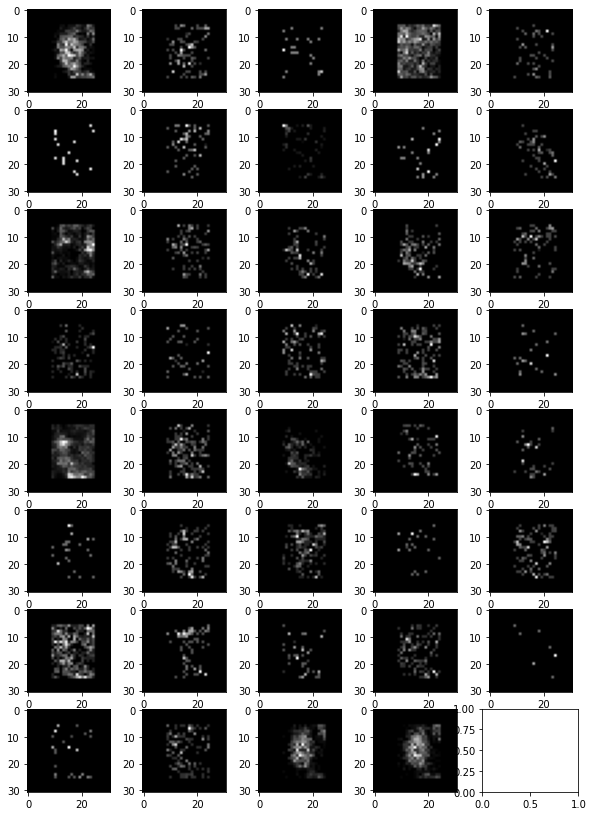

In [10]:
import matplotlib
from data2 import CellDataset

d = {'expression': False, 'center': False, 'ome': True, 'mask': False}
ds = CellDataset('train', d)
cell_k = 10000
x = ds[cell_k][0]
# plt.imshow(x)
axes = plt.subplots(8, 5, figsize=(5 * 2, 8 * 1.8))[1].flatten()
for i in range(39):
    axes[i].imshow(x[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))

## transform, no scaling, no centering

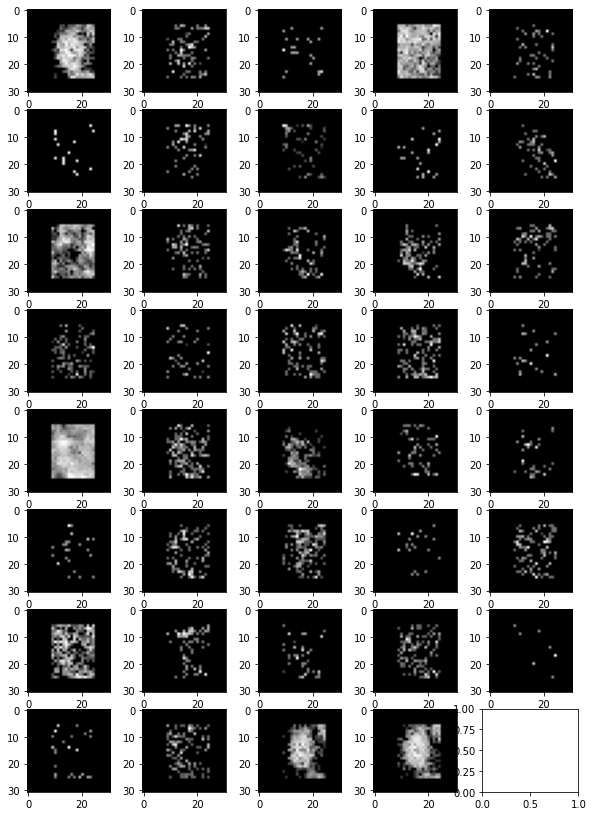

In [13]:
y = np.arcsinh(x)
axes = plt.subplots(8, 5, figsize=(5 * 2, 8 * 1.8))[1].flatten()
for i in range(39):
    axes[i].imshow(y[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))

## transform, scaling, centering

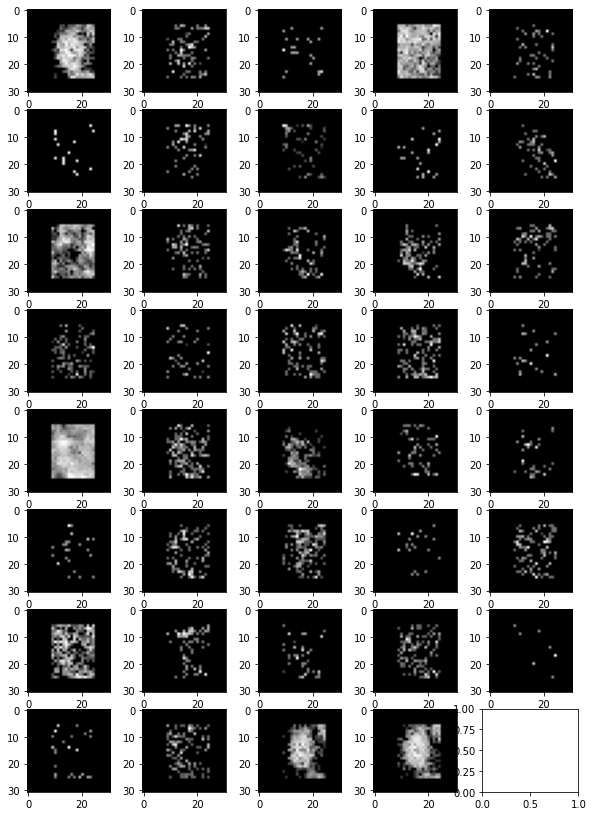

In [16]:
mean = np.array([0.3128328 , 0.08154685, 0.02617499, 0.31149776, 0.10011313,
       0.13143819, 0.04897958, 0.05522078, 0.02628855, 0.12524123,
       0.15552816, 0.08004793, 0.13349437, 0.02045013, 0.04155505,
       0.07637688, 0.05526352, 0.04818857, 0.11221485, 0.01779799,
       0.53215206, 0.08219107, 0.03510931, 0.08550659, 0.02237169,
       0.02657647, 0.09854327, 0.22031476, 0.04274541, 0.06778383,
       0.24079644, 0.09004467, 0.0234197 , 0.13312621, 0.04914724,
       0.29719813, 0.10172928, 0.18843424, 0.25893724])
std = np.sqrt(np.array([0.81152901, 0.11195328, 0.03844969, 0.76020458, 0.19636732,
       0.30648388, 0.06448294, 0.08879372, 0.03747649, 0.32956727,
       0.40133228, 0.11878445, 0.24177647, 0.02510913, 0.05398327,
       0.15110854, 0.09525968, 0.07278724, 0.17972434, 0.01950939,
       1.73329118, 0.11334923, 0.04934192, 0.15689578, 0.02762272,
       0.03045641, 0.16039316, 0.49438282, 0.07485281, 0.10151964,
       0.45035213, 0.15424273, 0.02854364, 0.23177609, 0.09494518,
       0.98995058, 0.14861627, 0.41785507, 0.66190155]))


z = y.copy()
z = (z - mean) / std
axes = plt.subplots(8, 5, figsize=(5 * 2, 8 * 1.8))[1].flatten()
for i in range(39):
    axes[i].imshow(z[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))

Maybe I should use quantiles to perform scaling and centering, or maybe just scaling, no centering. Otherwise the background is different between channels. But maybe this is not a problem since they are quite similar, and among cells the background, which is always 0, is identical

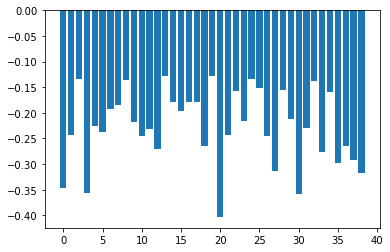

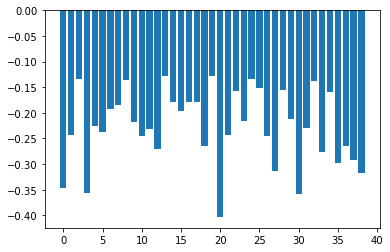

In [38]:
plt.bar(np.arange(39), z[0, 0, :])
plt.show()

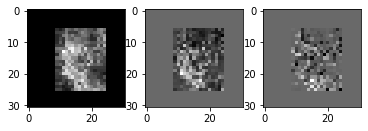

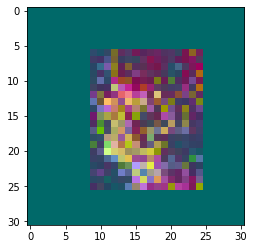

In [39]:
from sklearn.decomposition import PCA
reducer = PCA(3)
pca = z.reshape((-1, 39))
pca = reducer.fit_transform(pca)
a = np.min(pca, axis=0)
b = np.max(pca, axis=0)
pca = (pca - a) / (b - a)
pca.shape = [z.shape[0], z.shape[1], 3]
axes = plt.subplots(1, 3, figsize=(3 * 2, 1 * 1.8))[1].flatten()
for i in range(3):
    axes[i].imshow(pca[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))
plt.show()
plt.imshow(pca)
plt.show()

## per cell PCA

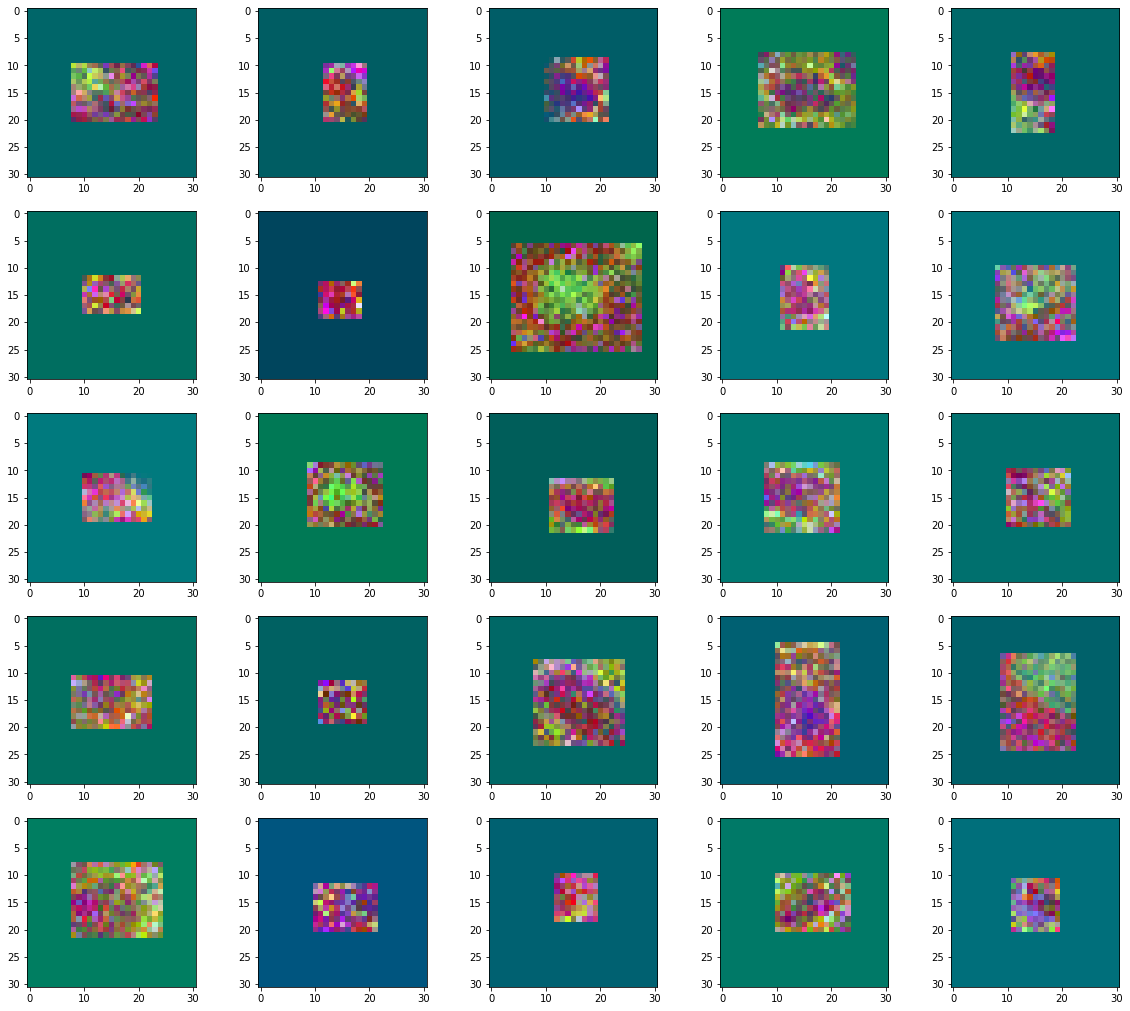

In [55]:
axes = plt.subplots(5, 5, figsize=(5 * 4, 5 * 3.6))[1].flatten()
for i in range(25):
    k = 1000 + i
    x = ds[k][0]
    z = (np.arcsinh(x) - mean) / std
    reducer = PCA(3)
    pca = z.reshape((-1, 39))
    pca = reducer.fit_transform(pca)
    a = np.min(pca, axis=0)
    b = np.max(pca, axis=0)
    pca = (pca - a) / (b - a)
    pca.shape = [z.shape[0], z.shape[1], 3]
    axes[i].imshow(pca)

## global PCA

[ -1.89303345 -10.03051639  -6.08467324] [22.14650635 11.09995976 11.53956775]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[-3.43603055e-15  1.09276271e-01  5.56130924e-02]
[-3.43603055e-15  1.48393526e-01  8.36480371e-02]
[-3.43603055e-15  5.19993307e-02  8.04801786e-02]
[-3.43603055e-15  1.83130184e-01  1.13612194e-01]
[-3.43603055e-15  2.37638986e-01  8.72671466e-02]
[-3.43603055e-15  1.63315212e-01  7.08135735e-03]
[-3.43603055e-15  7.76435354e-02  7.29376253e-04]
[-3.43603055e-15  1.18914614e-01  8.95929545e-02]
[0.86345927 1.00000104 0.89918159]
[-3.43603055e-15  1.53196648e-01  1.18216606e-01]
[-3.43603055e-15  1.08866244e-01  4.28192696e-02]
[-3.43603055e-15  1.53753647e-01  4.88656262e-02]
[-3.43603055e-15  7.29302189e-02  3.08632581e-02]
[1.         0.81472952 0.81172019]
[-3.43603055e-15  1.43492720e-01  1.13381951e-01]
[-3.43603055e-15  1.43492720e-01  9.51821018e-02]
[-3.43603055e-15  1.80698450e-01  4.39530669e-02]
[-3.43603055e-15 -8.08591556e-05  5.92350005e-02]
[-3.43603055e-15  9.44070541e-02  1.47725832e-01]
[-3.43603055e-15  1.36606353e-01  2.98987016e-02]
[-3.43603055e-15  1.21975248e-

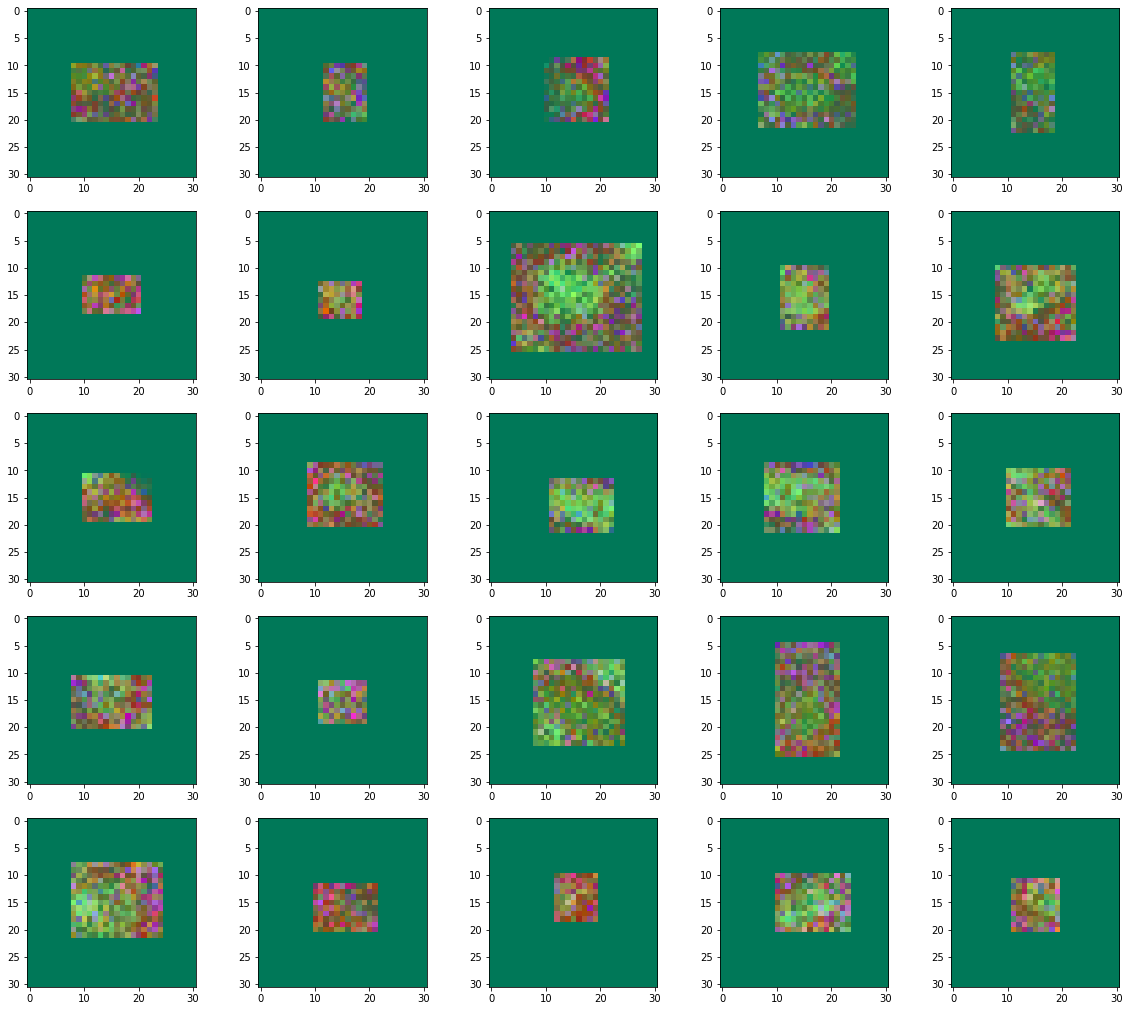

In [56]:
l = []
for i in range(25):
    k = 1000 + i
    x = ds[k][0]
    z = (np.arcsinh(x) - mean) / std
    z = z.reshape((-1, 39))
    l.append(z)
w = np.concatenate(l, axis=0)
reducer = PCA(3)
global_pca = reducer.fit_transform(w)
a = np.min(global_pca, axis=0)
b = np.max(global_pca, axis=0)
print(a, b)    
axes = plt.subplots(5, 5, figsize=(5 * 4, 5 * 3.6))[1].flatten()
for i in range(25):
    k = 1000 + i
    x = ds[k][0]
    z = (np.arcsinh(x) - mean) / std
    pca = z.reshape((-1, 39))
    pca = reducer.transform(pca)
    pca = (pca - a) / (b - a)
    if any(pca.min(0) < 0):
        print(pca.min(0))
    if any(pca.max(0) > 1):
        print(pca.max(0))
    pca.shape = [z.shape[0], z.shape[1], 3]
    axes[i].imshow(pca)